In [1]:
%matplotlib widget
from matplotlib.pyplot import *
from numpy import *
import requests
import time
import json

In [2]:
req = requests.get('https://app-prod-ws.meteoswiss-app.ch/v1/plzDetail', {'plz': 1202 * 100})
print(req)

dat = req.json()

<Response [200]>


In [3]:
req.url

'https://app-prod-ws.meteoswiss-app.ch/v1/plzDetail?plz=120200'

In [4]:
time.time()

1723925907.9376996

In [5]:
dat.keys()

dict_keys(['currentWeather', 'forecast', 'warnings', 'warningsOverview', 'graph'])

In [4]:
dat['graph'].keys()

dict_keys(['start', 'startLowResolution', 'precipitation10m', 'precipitationMin10m', 'precipitationMax10m', 'weatherIcon3h', 'weatherIcon3hV2', 'windDirection3h', 'windSpeed3h', 'sunrise', 'sunset', 'temperatureMin1h', 'temperatureMax1h', 'temperatureMean1h', 'precipitation1h', 'precipitationMin1h', 'precipitationMax1h', 'windSpeed1h', 'windSpeed1hq10', 'windSpeed1hq90', 'gustSpeed1h', 'gustSpeed1hq10', 'gustSpeed1hq90', 'sunshine1h', 'precipitationProbability3h'])

In [6]:
start = dat['graph']['start']
sunrise = dat['graph']['sunrise']
sunrise

[1723869439983,
 1723955915508,
 1724042391062,
 1724128866635,
 1724215342232,
 1724301817850]

In [6]:
len(dat['graph']['weatherIcon3h'])

48

<IPython.core.display.Javascript object>


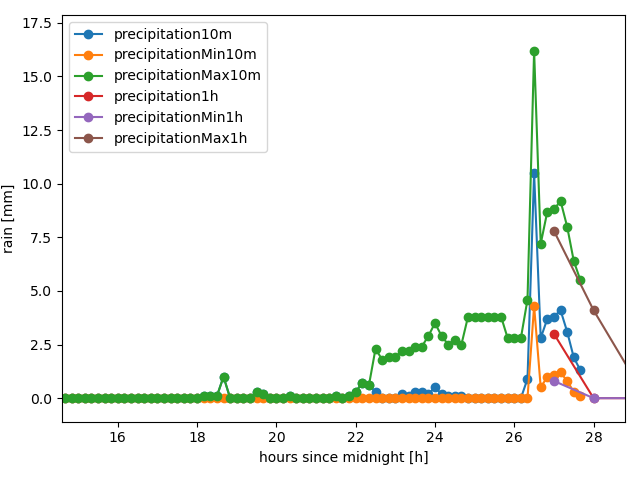

In [40]:
close()
x = arange(len(dat['graph']['precipitation10m'])) * 10 / 60
for l in ['precipitation10m', 'precipitationMin10m', 'precipitationMax10m']:
    plot(x, dat['graph'][l], '-o', label=l)
    
start = dat['graph']['start'] / 1000
start_l = dat['graph']['startLowResolution'] / 1000
offs = (start_l - start) / 60 / 60
x = arange(len(dat['graph']['precipitation1h'])) + offs
for l in ['precipitation1h', 'precipitationMin1h', 'precipitationMax1h']:
    plot(x, dat['graph'][l], '-o', label=l)
    
xlabel('hours since midnight [h]')
ylabel('rain [mm]')
legend()
tight_layout()

In [42]:
offs

27.0

/tmp/ipykernel_189756/4031584845.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  close()


<IPython.core.display.Javascript object>


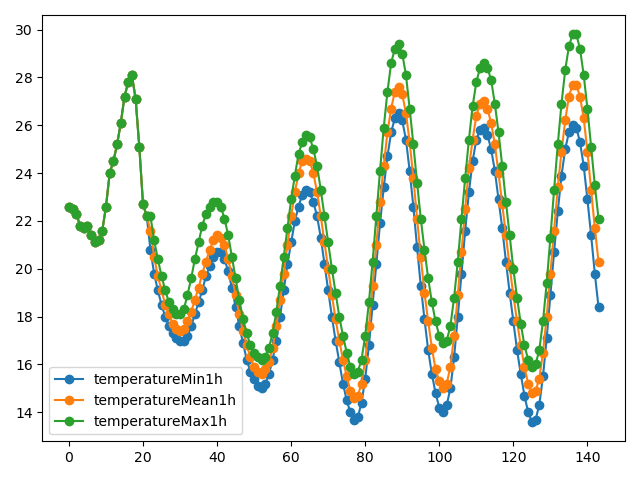

In [32]:
close()
for l in ['temperatureMin1h', 'temperatureMean1h', 'temperatureMax1h']:
    y = dat['graph'][l]
    plot(y, '-o', label=l)
legend()
tight_layout()

In [27]:
print(datetime.datetime.fromtimestamp(dat['graph']['start'] / 1000))

2024-08-17 00:00:00


In [28]:
len(dat['graph']['precipitation10m']) * 10 / 60

27.833333333333332

In [29]:
print(datetime.datetime.fromtimestamp(dat['graph']['startLowResolution'] / 1000))

2024-08-18 03:00:00


In [30]:
len(dat['graph']['precipitation1h']) / 24

4.875

In [31]:
len(dat['graph']['temperatureMean1h']) / 24

6.0

# Radar image

<img src="ksnip_20240820-190628.png"/>

In [2]:
with open('rate_20240820_1725.json') as f:
    rate = json.load(f)
rate

{'coords': {'system': 'LV95',
  'x_min': 255.5,
  'x_max': 964.5,
  'x_count': 710,
  'y_min': -159.5,
  'y_max': 479.5,
  'y_count': 640},
 'areas': [{'color': '9a7e95',
   'shapes': [[{'j': 1190, 'i': -1, 'd': 'NLNNLN', 'o': '0633', 'l': 0}],
    [{'j': 1140,
      'i': 5,
      'd': 'NLOMOMOMNNNNOMNNNNNNNNNNNNOMOMNNMOMONNNNNNOMNNNNNNMOLNKMKMKMKMLLLLKMLLLLLLMKLLLLMKLLKMKMLLLLLLMKLLKMLL',
      'o': '6666618636336668133636636333363163363663663338166336',
      'l': 0}],
    [{'j': 1166,
      'i': 9,
      'd': 'NLOMOMNNNNOMOMNNNNNNNNNNNNOMNNNNOMOMNNNNOMOMNNNNNNLNKMLLLLLNLNLLLLKMLLLLLNMOLNLNLNKMKMLLNLNLLLKMKMLLLLLLLLLLLLKMLLMKMK',
      'o': '686832683366366366636663633363336336333333336636336366373833',
      'l': 0}],
    [{'j': 1162, 'i': 35, 'd': 'NLNNLN', 'o': '6631', 'l': 0}],
    [{'j': 1076,
      'i': 45,
      'd': 'NLNLNLNNNNOMNNNNOMNNNNOMNNNNOMNNNNNNLNKMKMKMLLLLKMKMLLLLLLLLKMLLLL',
      'o': '6666366368366368363331181118163363',
      'l': 0}],
    [{'j': 1072,
      'i':

# Count some stuff

In [5]:
all_is = []
all_js = []
all_ds = []
all_os = []

for a in rate['areas']:
    for ss in a['shapes']:
        for s in ss:
            if (s['i'] == -1):
                print(s)
            all_is.append(s['i'])
            all_js.append(s['j'])
            all_ds.append(s['d'])
            all_os.append(s['o'])

all_is = array(all_is)
all_js = array(all_js)

{'j': 1190, 'i': -1, 'd': 'NLNNLN', 'o': '0633', 'l': 0}


Only the following letters are used for `d`

In [6]:
cs = set()
for d in all_ds:
    for c in d:
        cs.add(c)
cs

{'K', 'L', 'M', 'N', 'O'}

`d` is always of even length (comes in pairs)

In [9]:
lens = set()
for d in all_ds:
    lens.add(len(d) % 2)
lens

{0}

`len(o)` is always `len(d) / 2 + 1`

In [15]:
for o, d in zip(all_os, all_ds):
    if len(d) // 2 + 1 != len(o):
        print('not true')

In [76]:
len(all_is), amin(all_is), amax(all_is)

(263, -1, 1417)

In [77]:
len(all_js), amin(all_js), amax(all_js)

(263, 130, 1276)

In [3]:
close()

for a in rate['areas']:
    all_is = []
    all_js = []

    color = '#' + a['color']

    for ss in a['shapes']:
        for s in ss:
            if (s['i'] == -1):
                print(s)
            all_is.append(s['i'])
            all_js.append(s['j'])

    all_is = array(all_is)
    all_js = array(all_js)

    plot(all_is, all_js, 'o', color=color)

axis('equal')

NameError: name 'close' is not defined

<IPython.core.display.Javascript object>


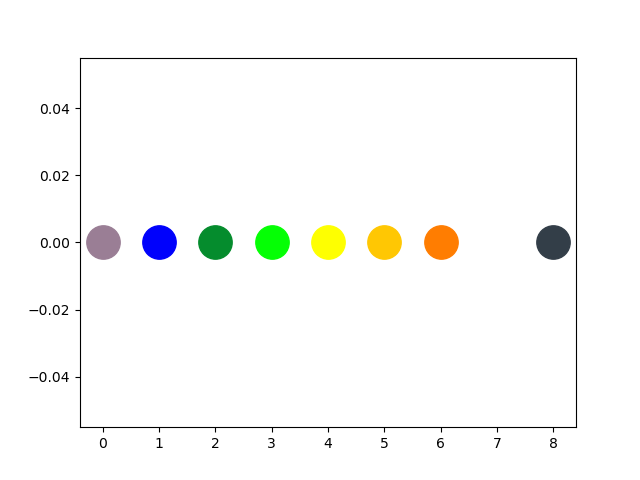

In [25]:
close()

for i, a in enumerate(rate['areas']):
    plot(i, 0, 'o', ms=24, color='#' + a['color'])

### The `shape` item

a `shape` is a list of several dicts. Each dict-item seems to correspond to a closed polygon at a particular location on the swiss map.

In [55]:
a = rate['areas'][6]
a['shapes']

[[{'j': 790,
   'i': 1155,
   'd': 'NLNLNLNLMKNLNNMOMOMOMOLNKMLLLL',
   'o': '8742699017623425',
   'l': 6}],
 [{'j': 796, 'i': 1185, 'd': 'NLOMNNMOLNKMLL', 'o': '03902490', 'l': 6}],
 [{'j': 810,
   'i': 1199,
   'd': 'NLOMNNNNNNMOLNKMKMLLMK',
   'o': '467571236352',
   'l': 6}],
 [{'j': 828,
   'i': 1213,
   'd': 'NLOMNNNNNNMOMOLNKMKMLLMKMK',
   'o': '25662598760932',
   'l': 6}]]

### items of the `shape` dict

'l' seems to be the rain level, indexing the color legend on the map. All shapes of one rain level are in one list item.

In [7]:
a = rate['areas'][4]
print(len(a['shapes']))
for s in a['shapes']:
    print(len(s), s[0]['l'])

19
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4


# The solution

In [160]:
# fname = 'rate_20240820_1725.json'
fname = '../test_draw/meteo_radar.json'
with open(fname) as f:
    rate = json.load(f)

coords = rate['coords']
print(coords)

hdr_x0 = coords["x_min"]
hdr_dx = (coords["x_max"] - coords["x_min"]) / coords["x_count"]
hdr_y0 = coords["y_min"]
hdr_dy = (coords["y_max"] - coords["y_min"]) / coords["y_count"]

# hdr_dx = hdr_dy = 1.0
# hdr_x0 = hdr_yo = 0.0

# These coefficients seem to never change
print(hdr_x0, hdr_y0, hdr_dx, hdr_dy)

def parsePolygon(e):   
    # e = {'i': 1385, 'j': 564, 'd': 'NLOMNNMOMOLNLLMKLL', 'o': '7871622526', 'l': 5}
    
    # starting point
    lon = e["i"]
    lat = e["j"]

    # Result
    points = []

    os = e["o"]  # fractional part
    ds = e["d"]  # incremental offset

    for i, o in enumerate(os):
        fraction = int(o, 10) / 10 + 0.05;

        # Add the fractional part, alternatingly to lon and lat
        if( lon % 2 == 0 ):
            lon2 = hdr_x0 + hdr_dx * (lon / 2)
            lat2 = hdr_y0 + hdr_dy * ((lat - 1) / 2 + fraction)
        else:
            lon2 = hdr_x0 + hdr_dx * ((lon - 1) / 2 + fraction)
            lat2 = hdr_y0 + hdr_dy * (lat / 2)

        # Bern (LV95 zero point) seem to be at 600, 200. The scale is in [km]
        # Move Bern to 0, 0 km
        pt = lon2 - 600, lat2 - 200

        points.append(pt)

        # Add the incremental offset from the 'd' string
        if 2 * i < len(ds):
            lon += ord(ds[2 * i] ) - 77
            lat += ord(ds[2 * i + 1] ) - 77

    points.append(points[0])
    return points

{'system': 'LV95', 'x_min': 255.5, 'x_max': 964.5, 'x_count': 710, 'y_min': -159.5, 'y_max': 479.5, 'y_count': 640}
255.5 -159.5 0.9985915492957746 0.9984375


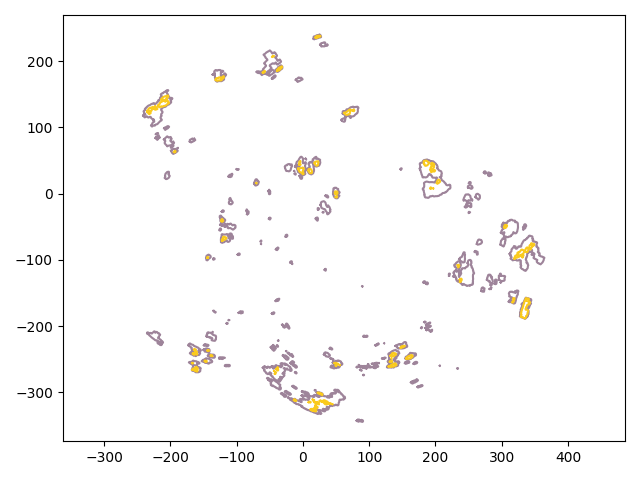

In [164]:
close('all')

coords = rate['coords']

for k in [0, 5]:
    a = rate['areas'][k]
    for ss in a['shapes']:
        for s in ss:
            pts = array(parsePolygon(s))
            c = '#' + a['color']
            # c = 'green'
            plot(pts[:, 0], pts[:, 1], '-', color=c)

axis('equal')
tight_layout()

# Figure out the coordinate system
The website has this javascript function. It returns WGS coordinates. We know the WGS coordinates of BERN, let's solve it and see what input it needs to output the BERN coordinates.

In [117]:
def ch_to_wgs(x, y):
    r = (x - 600000) / 1000000
    a = (y - 200000) / 1000000
    # r = x
    # a = y
    long = 2.6779094 + 4.728982 * r + 0.791484 * r * a + 0.1306 * r * a * a - 0.0436 * r * r * r
    lat = 16.9023892 + 3.238272 * a - 0.270978 * r * r - 0.002528 * a * a - 0.0447 * r * r * a - 0.014 * a * a * a
    return array((100 * long / 36, 100 * lat / 36))

bern_wgs = 7.438632495, 46.951082877

def to_solve(x):
    return ch_to_wgs(*x) - bern_wgs

In [132]:
to_solve((500000, 500000))

array([-1.38270227,  2.68897657])

In [166]:
from scipy.optimize import fsolve

fsolve(to_solve, (500000, 500000))

array([599999.64013053, 200000.19631455])

In [145]:
ch_to_wgs(600000, 200000)

array([ 7.43863722, 46.95108111])

## Check the scaling
it seems to be in [km]

In [152]:
delmont_lv95 = array((2593527.231871, 1245599.922795))
delmont_zero = delmont_lv95 - (2.6e6, 1.2e6)
delmont_zero

array([-6472.768129, 45599.922795])

# Some useful points in LV95

In [168]:
# east-most point (Müstair)
east = 2833836.2695107246

# west-most point (Geneva, Pougny)
west = 2485322.904321

width_km = (east - west) / 1000
width_km

348.5133651897246